# Machine Learning
## Projeto 1: Reconhecendo flores Iris



## Introdução
Neste trabalho serão apresentados dois algoritmos de aprendizado de máquina implementados manualmente sem a utilização de bibliotecas específicas que auxiliem os mesmos. Para os testes vão ser utilizados dados de um dataset conhecido como um dos primeiros problemas de aprendizado de máquina, o [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
    - Este dataset possui 50 exemplos de cada uma das três espécies de flores Iris (Iris setosa, Iris versicolor e Iris virginica).
    - Cada exemplo possui como dados as medidas de largura e comprimento das sépala e pétalas, respectivamente.


## kNN: k-Nearest Neighbors
O primeiro algoritmo a ser implementado se chama k-Nearest Neighbors (kNN), e sua tradução para o português pode ser interpretada como sendo k Vizinhos mais próximos. O seu funcionamento tem muito a ver com o nome que lhe foi dado, pois, ao ser dado um objeto, a análise para sua identificação é feita a partir da construção de um gráfico e observação das características de um número k de outros pontos próximos.


## Passo a passo
A partir de agora será mostrada a implementação de cada passo do algoritmo com suas devidas explicações.

### Criação da classe
Será utilizada orientação à objetos em Python para que criemos objetos de uma classe na qual haverá todos os métodos necessários para a concretização do reconhecimento. E, além disso, também poderemos guardar nos mesmos os dados a serem utilizados para o treinamento do nosso aprendizado. Desta forma, a primeira coisa que devemos fazer é uma classe onde implementaremos o nosso algoritmo.


In [1]:
class knn:
    "K-nearest-neighboards implementation"

### Método construtor
No método contrutor da classe, aquele que instanciará o objeto da mesma, serão criados três atributos:
    - trainingSet: este é um vetor que receberá os dados para o treinamento da classe.
    - answers: guardará qual o objeto associado a cada um dos parâmetros contidos no trainingSet   

In [3]:
    def __init__(self):
        self.trainingSet = []
        self.answers = []

### Aprendendo
Pelo fato desse algoritmo ser básico e seu funcionamento ser quase todo em tempo real, sem guardar muitas coisas na memória, o método learn, para aprendizado, servirá apenas para guardar na classe uma parte do dataset dado como referência, sendo X os parâmetros de cada objeto e Y a quais objetos eles se referem, respectivamente.

In [ ]:
    def learn(self, X, Y):
        self.trainingSet = X
        self.answers = Y

### Medição das distâncias
Dado um vetor que possui conjuntos de parâmetros na função para predição, que veremos mais para a frente, precisaremos calcular a distância de cada um dos objetos a serem classificados até os demais do ambiente, que estão no nosso vetor de treino. Para isso será criada uma função getDistance que receberá três parâmetros:
    - target1: vai ser um dos vetores com características de cada objeto contidos no grupo de predição.
    - target2: este será um ponto contido no nosso conjunto de treino, trainingSet como veremos futuramente.
    - limit: esse é simplesmente o número de características que deveremos calcular para cada objeto, como se estivéssemos dividindo cada objeto em um número n de gráficos, onde n é o número de valores associados a ele. Neste caso 4: comprimentos de pétala e sépala, larguras de pétala e sépala.
Para calcularmos esta distância será usada a [distância Euclidiana](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana).

In [6]:
    def __getDistance(self, target1, target2, limit):
        distance = 0
        for i in range(limit):
            distance += mt.pow((target1[limit] - target2[limit]), 2)
        return mt.sqrt(distance)

### Encontrando vizinhos próximos
Neste passo encontraremos os k vizinhos mais próximos. Para isso foi implementada uma classe getNearest (pegar os mais próximos) que receberá um conjunto de pontos já conhecidos, do trainingSet, um ponto a ser classificado e também um número k, que será a quantidade de pontos vizinhos a serem retornados. Desta forma ficaremos com o seguinte método:

In [7]:
    def __getNearest(self, trainingSet, testing, k):
        distances = []
        length = len(testing) - 1

        for i in range(len(trainingSet)):

            distance = self.__getDistance(testing, trainingSet[i], length)
            distances.append((distance, trainingSet[i], self.answers[i]))
        distances.sort(key=operator.itemgetter(0))
        nearest = []

        for i in range(k):
            nearest.append((distances[i][1], distances[i][2]))

        return nearest

### Classificando
Para efetuar a classificação de um ponto pegaremos os k vizinhos mais próximos, utilizando o método anterior, e a partir destes faremos uma contagem de quantos temos para cada tipo, como virginica, setosa e versicolor, neste caso. Após efetuarmos a contagem, o tipo com maior número de pontos próximos do que estamos classificando será selecionado, também, para este. Isso porque, de acordo com a ideologia do algoritmo, quanto mais pontos de um tipo perto de outro, são maiores as chances de ele ser do mesmo, isso porque estaria no mesmo ambiente ou área. E foi assim que foi implementada a classe getAnswer como pode ser visto a seguir:

In [8]:
    def __getAnswer(self, nearestSet):
        attributes = {}

        for i in range(len(nearestSet)):
            answer = nearestSet[i][-1]
            if answer not in attributes:
                attributes[answer] = 1
            else:
                attributes[answer] += 1

        answer = ""
        biggest = 0

        for each in attributes:
            if attributes[each] > biggest:
                answer = each
        return answer

### Fazendo funcionar
Bom, agora para fazer o nosso algoritmo funcionar precisamos juntar todas as funções anteriores de forma que ele retorne um tipo para o ponto desconhecido. Para isso foi criada a função prediction, que recebe como parâmetro apenas um vetor com pontos a serem classificados. O seu funcionamento nada mais é do que coordenar os métodos anteriores para funcionarem juntos, e para isso criamos um vetor predictions[] que receberá os resultados da classificação de cada ponto. Após isso, para cada ponto contido na lista que recebemos como parâmetro, calculamos quem são os k vizinhos mais próximos em nearest utilizando getNearest, e a partir destes, utilizando getAnswer, a partir da contagem de quantos pontos de cada tipo temos ao redor, recebemos o resultado da classificação de cada ponto. Após isso o resultado de cada classificação é guardado em predictions que é retornado no fnal, como abaixo: 

In [ ]:
    def predict(self, X):
        predictions = []

        for i in range(len(X)):
            nearest = self.__getNearest(self.trainingSet, X[i], 2)
            result = self.__getAnswer(nearest)
            predictions.append(result)

        return predictions

## Testando a classe
Com a classe já pronta precisaremos testa-la, e para isso alguns métodos podem facilitar o trabalho, desta forma criaremos alguns para automatizar os processos.

### Separando o dataset
Primeiro será criada uma função splitDataSet que dividirá, de acordo com o valor recebido como parâmetro, o dataset das flores Iris em dois, um para treino e outro para teste. O número recebido como parâmetro será uma porcentagem em forma decimal.

In [9]:
def splitDataSet(split):

    data = list(datasets.load_iris()['data'])
    names = list(datasets.load_iris()['target_names'])
    namesEach = list(datasets.load_iris()['target'])

    trainingSet = []
    namesTraining = []
    testSet = []
    correctNames = []

    for i in range(len(data)):

        [float(x) for x in data[i]]

        if random.random() < split:
            trainingSet.append(data[i])
            namesTraining.append(names[namesEach[i]])
        else:
            testSet.append(data[i])
            correctNames.append((names[namesEach[i]]))

    return [trainingSet, testSet, namesTraining, correctNames]


### Finalizando a análise
Por fim, devemos criar um método para saber exatamente qual o número de acertos do nosso algoritmo. Para isso o mesmo deve receber uma lista com as classificações corretas das flores para os parâmetros dados no nosso teste, ou predição, e também um outro vetor contendo as classificações feitas pela nossa classe, este gerado pela classe prediction. Desta forma teremos a função getAccuracy como: 

In [1]:
def getAccuracy(testing, predicts):
    aux = 0
    length = len(testing)
    for i in range(length):
        if predicts[i] == testing[i]:
            aux += 1
        print("> predicted= " + predicts[i] + ", correct= "+testing[i])
    return (aux/float(length))*100.00

### Testando
Agora testaremos o algoritmo para provar o quanto pode ser eficaz:

In [33]:
from sklearn import datasets #dataset
import random #usado para separar os datasets de forma a pegar numeros aleatorios
import operator #usado para auxiliar um sort como uma key
import math as mt #operacoes matematicas dentro do algoritmo

class knn:
    "K-nearest-neighboards implementation"

    def __init__(self):
        self.trainingSet = [] #vetor de parametros estudados
        self.answers = [] #vetor com a resposta para os parametros estudados

    def __getDistance(self, target1, target2, limit):
        distance = 0

        for i in range(limit):
            distance += mt.pow((target1[limit] - target2[limit]), 2)

        return mt.sqrt(distance) #retorna a distancia euclidiana

    def __getNearest(self, trainingSet, testing, k):
        distances = []
        length = len(testing) - 1 #variavel usada para nao repetir a chamada da funcao len()

        for i in range(len(trainingSet)):

            distance = self.__getDistance(testing, trainingSet[i], length) #calculando a distancia entre cada ponto da lista de testes e todos os vizinhos to vetor de treinamento
            distances.append((distance, trainingSet[i], self.answers[i])) #insere no vetor distances uma tupla com a distancia calculada, o ponto de treinamento e a classificacao correspondente
        distances.sort(key=operator.itemgetter(0)) #ordenando pela distancia para pegar os mais próximos
        nearest = []

        for i in range(k):
            nearest.append((distances[i][1], distances[i][2])) #adicionando somente os k mais proximos em nearest

        return nearest

    def __getAnswer(self, nearestSet):
        attributes = {}

        for i in range(len(nearestSet)):
            answer = nearestSet[i][-1] #guardando o nome de cada um dos vizinhos proximos
            if answer not in attributes:
                attributes[answer] = 1 #se nao estiver no dicionario e criada uma nova chave com valor um
            else:
                attributes[answer] += 1 #se já existir uma chave com esse nome apenas incrementa

        answer = ""
        biggest = 0

        for each in attributes:
            if attributes[each] > biggest: #pega a chave com maior quantidade
                answer = each
        return answer #retorna a classificacao

    def learn(self, X, Y):
        self.trainingSet = X #guarda os parametros de um grupo
        self.answers = Y #guarda as classificacoes para esses parametros

    def predict(self, X):
        predictions = []

        for i in range(len(X)):
            nearest = self.__getNearest(self.trainingSet, X[i], 2) #guarda os vizinhos mais proximos do elemento atual de X
            result = self.__getAnswer(nearest) #guarda a possivel classificacao
            predictions.append(result) #para cada parametro em X é guardada uma classificacao em predictions

        return predictions #retorna um vetor com os resultados para a lista recebida como parametro

def splitDataSet(split):

    data = list(datasets.load_iris()['data']) #guarda uma lista com todos os parametros desse dataset
    names = list(datasets.load_iris()['target_names']) #guarda uma lista com todos os nomes possiveis, nesse caso 3
    namesEach = list(datasets.load_iris()['target']) #guarda uma lista com os resultados para os parametros da lista data, em forma de inteiros

    trainingSet = []
    namesTraining = []
    testSet = []
    correctNames = []

    for i in range(len(data)):

        [float(x) for x in data[i]] #convertendo float do numpy para float comum

        if random.random() < split: #dividindo dataset entre treino e teste de acordo com o valor passado
            trainingSet.append(data[i])
            namesTraining.append(names[namesEach[i]])
        else:
            testSet.append(data[i])
            correctNames.append((names[namesEach[i]]))

    return [trainingSet, testSet, namesTraining, correctNames] #retorna o set para treino, para test e os respectivos nome de cada objeto contido

def getAccuracy(testing, predicts): #retorna o percentual de acertos dados um vetor com os resultados corretos e outro com os feitos pelo algoritmo 
    aux = 0
    length = len(testing)
    for i in range(length):
        if predicts[i] == testing[i]:
            aux += 1
    return (aux/float(length))*100.00

def getByAnswer(transform): #funcao para separar a quantidade de cada objeto classificado
    result = {}
    for each in transform:
        if each not in result:
            result[str(each)] = 1
        else:
            result[each] += 1
    
    return result



data = splitDataSet(0.7) #dividindo o data set em dois, nesse caso 70% para treino e o restante para teste
correctNames = data[3] #guardando as classificacoes corretas do testSet para comparar no final
knn = knn() 
knn.learn(data[0], data[2]) #treinando o objeto
predicted = knn.predict(data[1])#fazendo a predição
quantityPedicted = getByAnswer(predicted)
print("predicted= ",quantityPredicted)
quantityAnswer = getByAnswer(correctNames)
print("corretos= ",quantityAnswer)
accuracy = getAccuracy(correctNames, predicted) #pegando o percentual de acerto

print("taxa de acerto= %.2f"%accuracy+"%")

predicted=  {'versicolor': 16, 'setosa': 13, 'virginica': 14}
corretos=  {'versicolor': 16, 'setosa': 19, 'virginica': 18}
taxa de acerto= 94.34%




## NaiveBayes
O próximo algoritmo a ser apresentado tem como nome NaiveBayes, e isso acontece pelo fato do mesmo basear-se em cálculos probabilísticos que tem como origem o teorema de Bayes. Motivado pelo uso de probabilidade condicional, o algoritmo calcula a probabilidade de um certo objeto ser classificado de uma forma de acordo com as probabilidades dos objetos próximos. Ou seja, basicamente o algoritmo apresentado calcula a chance de um acontecimento considerando a probabilidade de outros acontecimentos, onde o primeiro é o ponto ao qual estamos classificando e os demais seriam as classificações dos pontos próximos.

## Passo a passo
A partir de agora serão explicados os passos para a integralização do algoritmo sem repetir os usados no anterior.

### Método construtor
No método contrutor desta classe serão inicializados os seguintes atributos:
    - trainingSet: este é um vetor que receberá os dados para o treinamento da classe.
    - answers: guardará qual o objeto associado a cada um dos parâmetros contidos no trainingSet.
    - initialProb: mantém as probabilidades iniciais de cada classificação acontecer de acordo com o 
    trainingSet.
    - auxiliar: será um dicionário auxiliar para guardar quantas vezes cada chave apareceu nos resultados do aprendizado.
    - count: serve para guardar quantas vezes uma resposta apareceu em Y e armazená-lo em auxiliar.
    - data: armazenará vetores que vão conter as probabilidades de pontos próximos para cada elemento em X.
    - split: armazenará um valor percentual que será utilizado para definir os valores mínimo e máximo para as probabilidades próximas, nesse caso utilizaremos 30%.

In [ ]:
    def __init__(self, split):
        self.trainingSet = []
        self.answers = []
        self.initialProb = {}
        self.auxiliar = {}
        self.count = {}
        self.data = {}
        self.split = split

## Aprendendo
Para começar são guardados os valores passados como parâmetro no próprio objeto. Após isso, são guardados todos os resultados recebidos em uma variável e a quantidade de aparições em outra. A partir destas e o número total de elementos nestes vetores é calculada a probabilidade de cada um desses tipos acontecer no nosso ambiente recebido. Por fim é criada, também, uma variável que guarda outros vetores, onde cada vetor deste mantém as probabilidades de elementos próximos acontecerem para cada ponto do dataset recebido.

In [ ]:
    def learn(self, X, Y):
        self.trainingSet = X #guarda valor no objeto
        self.answers = Y #guarda valor no objeto

        keys, counts = np.unique(Y, return_counts=True) #keys recebe todas as chaves do dicionário Y e counts será o número associado, sendo a quantidade de aparições

        length = len(Y)

        for i in range(len(keys)):
            self.initialProb[keys[i]] = counts[i]/length #guardando a probabilidade de cada chave aparecer em Y
        for i in range(len(keys)):
            self.auxiliar[keys[i]] = counts[i] #guardando quantas vezes cada chave apareceu em Y em um dicionario

        Ycopy = set(Y)

        for i in Ycopy:
            self.data[i] = [] #cria um vetor para armazenar as probabilidades dos elementos próximos
        for i in range(len(Y)):
            self.data[Y[i]].append(X[i])

## Contagem
Este método é simples, porém essencial para o funcionamento do algoritmo. O que ele faz é receber um parâmetro para acessar a variável data especificada mais acima, outro para acessar as váriaveis desta mencionada no primeiro parâmetro, e valores de mínimo e máximo que definirão alcance dos pontos próximos a serem pegos. Por fim ele retornará uma contagem com todas as instâncias dentro do alcance definido como parâmetro.

In [ ]:
    def __count(self, target, index, min, max): #retorna a soma das probabilidades com base nos elementos mais próximos
        count = 0
        for i in range(len(self.data[target])):
            if self.data[target][i][index] >= min and self.data[target][i][index] <= max: #verifica se está dentro do alcance
                count += 1
        return count

## Multiplicando
A próxima função é para auxiliar nossa classe na hora de fazer a predição, e o que ela faz é receber dois dicionários e efetuar a multiplicação entre os atributos de cada chave contida em ambos, e após isso armazenando os resultados em um novo dicionário. Isso será de grande serventia na hora de multiplicarmos as probabilidades guardadas.

In [18]:
    def __multiplyProbs(self,target1 ,target2): #multiplica as probabilidades contidas em dois dicionários e retorna um novo com os resultados
        result = {}
        for i in target1:
            result[i] = target1[i]*target2[i]
        return result


## Fazendo funcionar
Por fim faremos nosso método de predição, e o mesmo funciona de forma parecida com os k vizinhos mais próximos. Primeiramente é criado um vetor que conterá os resultados a serem retornados, após isso, para cada elemento contido na lista recebida como parâmetro nós utilizaremos os métodos anteriores para calcular as probabilidades dos pontos mais próximos, dentro do alcance determinado, e então armazenar os com maior probabilidade, para cada ponto, no vetor de resultado.

In [19]:
    def predict(self, X): #Retorna um vetor com as respostas para o parametro recebido
        result = []
        for i in range(len(X)): #Para cada item no vetor a ser classificado
            initial = self.initialProb.copy() #criando uma copia das probabilidades iniciais para que a linha 60 nao faca modificacoes
            for k in range(len(X[i])):
                minimum = X[i][j] * (1-self.split) #minimo do alcance em percentagem
                maximum = X[i][j] * (1+self.split) #maximo do alcance em percentagem
                for key in self.initialProb:
                    initial[key] *= self.__count(key, k, minimum, maximum)/self.auxiliar[key]
            result.append(max(initial, key=initial.get))#Armazena o maior valor encontrado
        return result

## Testando
Para finalizar testaremos nosso algoritmo utilizando de métodos auxiliares implementados anteriormente para medir sua taxa de acertos.

In [28]:
from sklearn import datasets #dataset
import numpy as np

class NaiveBayes:
    """NaiveBayes implementation"""

    def __init__(self, split):
        self.trainingSet = []
        self.answers = []
        self.initialProb = {}
        self.auxiliar = {}
        self.count = {}
        self.data = {}
        self.split = split

    def learn(self, X, Y):
        self.trainingSet = X #guarda valor no objeto
        self.answers = Y #guarda valor no objeto

        keys, counts = np.unique(Y, return_counts=True) #keys recebe todas as chaves do dicionário Y e counts será o número associado, sendo a quantidade de aparições

        length = len(Y)

        for i in range(len(keys)):
            self.initialProb[keys[i]] = counts[i]/length #guardando a probabilidade de cada chave aparecer em Y
        for i in range(len(keys)):
            self.auxiliar[keys[i]] = counts[i] #guardando quantas vezes cada chave apareceu em Y em um dicionario

        Ycopy = set(Y)

        for i in Ycopy:
            self.data[i] = [] #cria um vetor para armazenar as probabilidades dos elementos próximos
        for i in range(len(Y)):
            self.data[Y[i]].append(X[i])

    def __count(self, target, index, min, max): #retorna a soma das probabilidades com base nos elementos mais próximos
        count = 0
        for i in range(len(self.data[target])):
            if self.data[target][i][index] >= min and self.data[target][i][index] <= max:
                count += 1
        return count

    def __multiplyProbs(self,target1 ,target2): #multiplica as probabilidades contidas em dois dicionários e retorna um novo com os resultados
        result = {}
        for i in target1:
            result[i] = target1[i]*target2[i]
        return result

    def predict(self, X): #Retorna um vetor com as respostas para o parametro recebido
        result = []
        for i in range(len(X)): #Para cada item no vetor a ser classificado
            initial = self.initialProb.copy() #criando uma copia das probabilidades iniciais para que a linha 60 nao faca modificacoes
            for j in range(len(X[i])):
                minimum = X[i][j] * (1-self.split)
                maximum = X[i][j] * (1+self.split)
                for key in self.initialProb:
                    initial[key] *= self.__count(key, j, minimum, maximum)/self.auxiliar[key]
            result.append(max(initial, key=initial.get))#Armazena o maior vaor encontrado
        return result

def splitDataSet(split):

    data = list(datasets.load_iris()['data']) #guarda uma lista com todos os parametros desse dataset
    names = list(datasets.load_iris()['target_names']) #guarda uma lista com todos os nomes possiveis, nesse caso 3
    namesEach = list(datasets.load_iris()['target']) #guarda uma lista com os resultados para os parametros da lista data, em forma de inteiros

    trainingSet = []
    namesTraining = []
    testSet = []
    correctNames = []

    for i in range(len(data)):

        [float(x) for x in data[i]] #convertendo float do numpy para float comum

        if random.random() < split: #dividindo dataset entre treino e teste de acordo com o valor passado
            trainingSet.append(data[i])
            namesTraining.append(names[namesEach[i]])
        else:
            testSet.append(data[i])
            correctNames.append((names[namesEach[i]]))

    return [trainingSet, testSet, namesTraining, correctNames] #retorna o set para treino, para test e os respectivos nome de cada objeto contido

def getAccuracy(testing, predicts): #retorna o percentual de acertos dados um vetor com os resultados corretos e outro com os feitos pelo algoritmo 
    aux = 0
    length = len(testing)
    for i in range(length):
        if predicts[i] == testing[i]:
            aux += 1
    return (aux/float(length))*100.00

def getByAnswer(transform): #funcao para separar a quantidade de cada objeto classificado
    result = {}
    for each in transform:
        if each not in result:
            result[str(each)] = 1
        else:
            result[each] += 1
    return result

data = splitDataSet(0.7) #dividindo o data set em dois, nesse caso 70% para treino e o restante para teste
correctNames = data[3] #guardando as classificacoes corretas do testSet para comparar no final
naive = NaiveBayes(0.3) #30% para o alcance 
naive.learn(data[0], data[2]) #treinando o objeto
predicted = naive.predict(data[1])#fazendo a predição
quantityPredicted = getByAnswer(predicted)
print("predicted= ",quantityPredicted)
quantityAnswer = getByAnswer(correctNames)
print("corretos= ",quantityAnswer)
accuracy = getAccuracy(correctNames, predicted) #pegando o percentual de acerto

print("taxa de acerto= %.2f"%accuracy+"%")    


predicted=  {'versicolor': 16, 'setosa': 13, 'virginica': 14}
corretos=  {'versicolor': 14, 'setosa': 13, 'virginica': 16}
taxa de acerto= 95.35%


## Comparando acertos
Agora testaremos ambos os algoritmos passando exatamente os mesmos dados para aprendizagem e predição.

In [1]:
from sklearn import datasets #dataset
import random #usado para separar os datasets de forma a pegar numeros aleatorios
import operator #usado para auxiliar um sort como uma key
import math as mt #operacoes matematicas dentro do algoritmo

class knn:
    "K-nearest-neighboards implementation"

    def __init__(self):
        self.trainingSet = [] #vetor de parametros estudados
        self.answers = [] #vetor com a resposta para os parametros estudados

    def __getDistance(self, target1, target2, limit):
        distance = 0

        for i in range(limit):
            distance += mt.pow((target1[limit] - target2[limit]), 2)

        return mt.sqrt(distance) #retorna a distancia euclidiana

    def __getNearest(self, trainingSet, testing, k):
        distances = []
        length = len(testing) - 1 #variavel usada para nao repetir a chamada da funcao len()

        for i in range(len(trainingSet)):

            distance = self.__getDistance(testing, trainingSet[i], length) #calculando a distancia entre cada ponto da lista de testes e todos os vizinhos to vetor de treinamento
            distances.append((distance, trainingSet[i], self.answers[i])) #insere no vetor distances uma tupla com a distancia calculada, o ponto de treinamento e a classificacao correspondente
        distances.sort(key=operator.itemgetter(0)) #ordenando pela distancia para pegar os mais próximos
        nearest = []

        for i in range(k):
            nearest.append((distances[i][1], distances[i][2])) #adicionando somente os k mais proximos em nearest

        return nearest

    def __getAnswer(self, nearestSet):
        attributes = {}

        for i in range(len(nearestSet)):
            answer = nearestSet[i][-1] #guardando o nome de cada um dos vizinhos proximos
            if answer not in attributes:
                attributes[answer] = 1 #se nao estiver no dicionario e criada uma nova chave com valor um
            else:
                attributes[answer] += 1 #se já existir uma chave com esse nome apenas incrementa

        answer = ""
        biggest = 0

        for each in attributes:
            if attributes[each] > biggest: #pega a chave com maior quantidade
                answer = each
        return answer #retorna a classificacao

    def learn(self, X, Y):
        self.trainingSet = X #guarda os parametros de um grupo
        self.answers = Y #guarda as classificacoes para esses parametros

    def predict(self, X):
        predictions = []

        for i in range(len(X)):
            nearest = self.__getNearest(self.trainingSet, X[i], 2) #guarda os vizinhos mais proximos do elemento atual de X
            result = self.__getAnswer(nearest) #guarda a possivel classificacao
            predictions.append(result) #para cada parametro em X é guardada uma classificacao em predictions

        return predictions #retorna um vetor com os resultados para a lista recebida como parametro

################################################################################################################

import numpy as np

class NaiveBayes:
    """NaiveBayes implementation"""

    def __init__(self, split):
        self.trainingSet = []
        self.answers = []
        self.initialProb = {}
        self.auxiliar = {}
        self.count = {}
        self.data = {}
        self.split = split

    def learn(self, X, Y):
        self.trainingSet = X #guarda valor no objeto
        self.answers = Y #guarda valor no objeto

        keys, counts = np.unique(Y, return_counts=True) #keys recebe todas as chaves do dicionário Y e counts será o número associado, sendo a quantidade de aparições

        length = len(Y)

        for i in range(len(keys)):
            self.initialProb[keys[i]] = counts[i]/length #guardando a probabilidade de cada chave aparecer em Y
        for i in range(len(keys)):
            self.auxiliar[keys[i]] = counts[i] #guardando quantas vezes cada chave apareceu em Y em um dicionario

        Ycopy = set(Y)

        for i in Ycopy:
            self.data[i] = [] #cria um vetor para armazenar as probabilidades dos elementos próximos
        for i in range(len(Y)):
            self.data[Y[i]].append(X[i])

    def __count(self, target, index, min, max): #retorna a soma das probabilidades com base nos elementos mais próximos
        count = 0
        for i in range(len(self.data[target])):
            if self.data[target][i][index] >= min and self.data[target][i][index] <= max:
                count += 1
        return count

    def __multiplyProbs(self,target1 ,target2): #multiplica as probabilidades contidas em dois dicionários e retorna um novo com os resultados
        result = {}
        for i in target1:
            result[i] = target1[i]*target2[i]
        return result

    def predict(self, X): #Retorna um vetor com as respostas para o parametro recebido
        result = []
        for i in range(len(X)): #Para cada item no vetor a ser classificado
            initial = self.initialProb.copy() #criando uma copia das probabilidades iniciais para que a linha 60 nao faca modificacoes
            for j in range(len(X[i])):
                minimum = X[i][j] * (1-self.split)
                maximum = X[i][j] * (1+self.split)
                for key in self.initialProb:
                    initial[key] *= self.__count(key, j, minimum, maximum)/self.auxiliar[key]
            result.append(max(initial, key=initial.get))#Armazena o maior vaor encontrado
        return result

def splitDataSet(split):

    data = list(datasets.load_iris()['data']) #guarda uma lista com todos os parametros desse dataset
    names = list(datasets.load_iris()['target_names']) #guarda uma lista com todos os nomes possiveis, nesse caso 3
    namesEach = list(datasets.load_iris()['target']) #guarda uma lista com os resultados para os parametros da lista data, em forma de inteiros

    trainingSet = []
    namesTraining = []
    testSet = []
    correctNames = []

    for i in range(len(data)):

        [float(x) for x in data[i]] #convertendo float do numpy para float comum

        if random.random() < split: #dividindo dataset entre treino e teste de acordo com o valor passado
            trainingSet.append(data[i])
            namesTraining.append(names[namesEach[i]])
        else:
            testSet.append(data[i])
            correctNames.append((names[namesEach[i]]))

    return [trainingSet, testSet, namesTraining, correctNames] #retorna o set para treino, para test e os respectivos nome de cada objeto contido

def getAccuracy(testing, predicts): #retorna o percentual de acertos dados um vetor com os resultados corretos e outro com os feitos pelo algoritmo 
    aux = 0
    length = len(testing)
    for i in range(length):
        if predicts[i] == testing[i]:
            aux += 1
    return (aux/float(length))*100.00

def getByAnswer(transform): #funcao para separar a quantidade de cada objeto classificado
    result = {}
    for each in transform:
        if each not in result:
            result[str(each)] = 1
        else:
            result[each] += 1
    return result

data = splitDataSet(0.7)
correctNames = data[3]
knn = knn()
bayes = NaiveBayes(0.3)
knn.learn(data[0], data[2])
bayes.learn(data[0], data[2])
predictKNN = knn.predict(data[1])
predictBayes = bayes.predict(data[1])
quantitiesKNN = sorted(getByAnswer(predictKNN))
quantitiesBayes = sorted(getByAnswer(predictBayes))
accuracyknn = getAccuracy(correctNames, predictKNN)
accuracybayes = getAccuracy(correctNames, predictBayes)

print("taxa de acerto kNN= %.2f"%accuracyknn+"%")
print("taxa de acerto Bayes= %.2f"%accuracybayes+"%")
print("kNN predicted= ", quantitiesKNN)
print("Bayes predicted= ", quantitiesBayes)
quantityAnswer = getByAnswer(correctNames)


print("corretos= ",quantityAnswer)

taxa de acerto kNN= 92.00%
taxa de acerto Bayes= 90.00%
kNN predicted=  ['setosa', 'versicolor', 'virginica']
Bayes predicted=  ['setosa', 'versicolor', 'virginica']
corretos=  {'virginica': 16, 'setosa': 23, 'versicolor': 11}


In [122]:
import matplotlib.pyplot as plt
def plotBars(dict):
    D = dict
    plt.style.use('fivethirtyeight')
    bars = plt.bar(range(len(D)), D.values(), align='center')
    bars[0].set_color('r')
    bars[1].set_color('b')
    bars[2].set_color('g')
    plt.xticks(range(len(D)), list(D.keys()))

    plt.show()

### Resultado kNN em gráfico

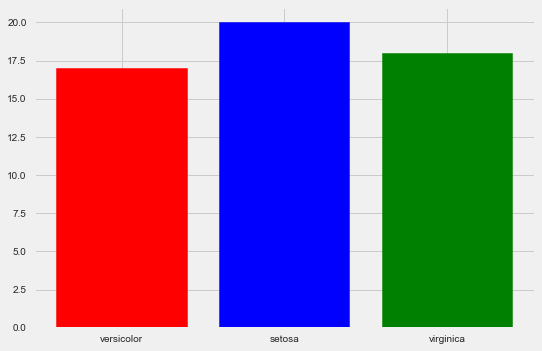

resultado kNN=  {'versicolor': 17, 'setosa': 20, 'virginica': 18}


In [123]:
plotBars(quantitiesKNN)

print("resultado kNN= ",quantitiesKNN)

### Resultado NaiveBayes em gráfico

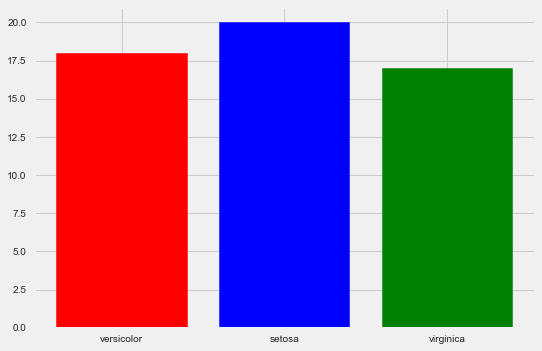

resultado NaiveBayes=  {'versicolor': 18, 'setosa': 20, 'virginica': 17}


In [124]:
plotBars(quantitiesBayes)

print("resultado NaiveBayes= ",quantitiesBayes)

### Resultado esperado em gráfico

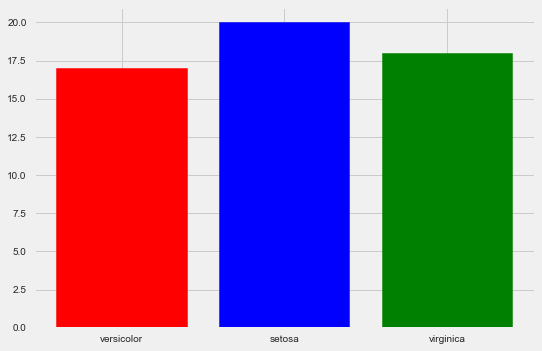

resultado esperado=  {'versicolor': 17, 'setosa': 20, 'virginica': 18}


In [125]:
plotBars(quantityAnswer)

print("resultado esperado= ",quantityAnswer)

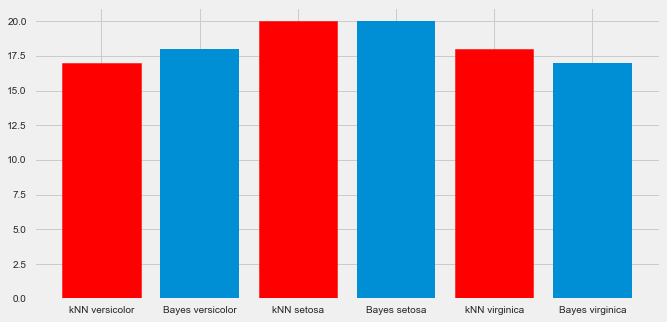

resultado NaiveBayes=  {'versicolor': 18, 'setosa': 20, 'virginica': 17}
resultado kNN=         {'versicolor': 17, 'setosa': 20, 'virginica': 18}


In [132]:
names = []
values = []
for each in quantitiesKNN:
    names += ["kNN "+each]
    values += [quantitiesKNN[each]]
    names += ["Bayes "+each]
    values += [quantitiesBayes[each]]
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
bars = plt.bar(range(len(D)+len(E)), values, align='center')
for k in range(0, 6, 2):
    bars[k].set_color('r')
plt.xticks(range(len(D)+len(E)), names)

plt.show()

print("resultado NaiveBayes= ",quantitiesBayes)
print("resultado kNN=        ",quantitiesKNN)

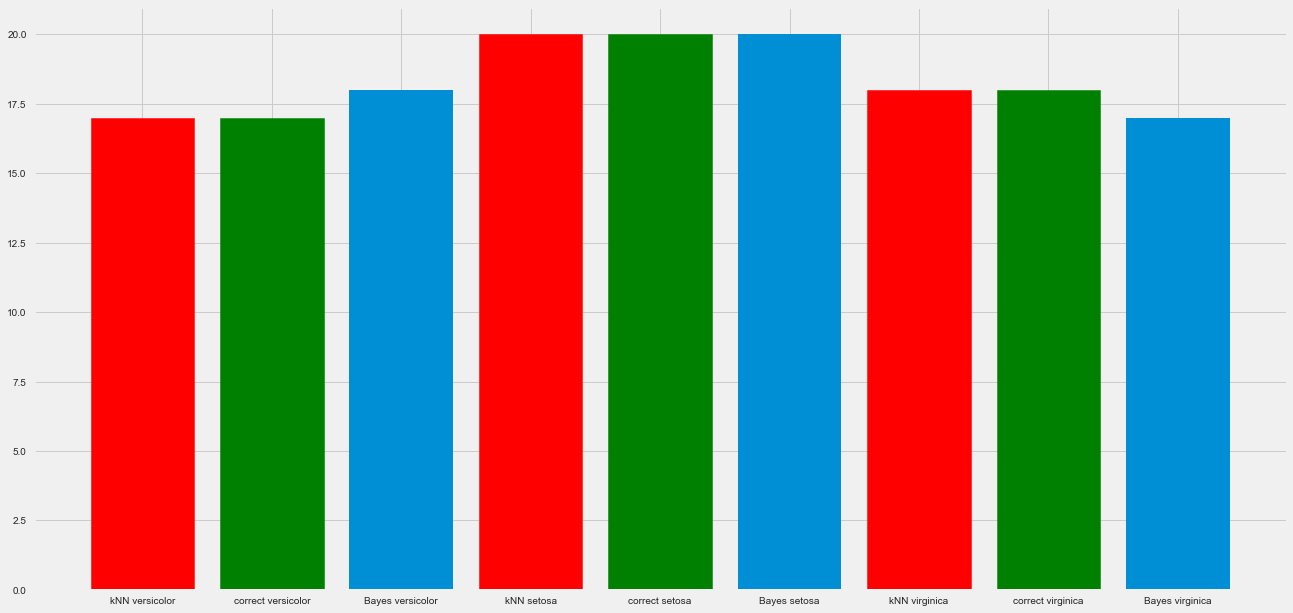

resultado NaiveBayes=  {'versicolor': 18, 'setosa': 20, 'virginica': 17}
resultado kNN=         {'versicolor': 17, 'setosa': 20, 'virginica': 18}
resultado esperado=    {'versicolor': 17, 'setosa': 20, 'virginica': 18}


In [129]:
names = []
values = []
for each in quantitiesKNN:
    names += ["kNN "+each]
    values += [quantitiesKNN[each]]
    names+= ["correct "+each]
    values += [quantityAnswer[each]]
    names += ["Bayes "+each]
    values += [quantitiesBayes[each]]
plt.figure(figsize=(20, 10)) 
bars = plt.bar(range(9), values, align='center')
for k in range(0, 9, 3):
    bars[k].set_color('r')
for k in range(1, 9, 3):
    bars[k].set_color('g')
plt.xticks(range(9), names)

plt.show()

print("resultado NaiveBayes= ",quantitiesBayes)
print("resultado kNN=        ",quantitiesKNN)
print("resultado esperado=   ", quantityAnswer)

## Comparação
   Visto que os dois algoritmos tem uma forma de funcionamento muito parecida, dados os mesmo datasets de X e Y para treinamento, e X para predição pudemos perceber que suas taxas de acerto estão sempre muito próximas. Em relação à variação de resultados, ao serem rodados novamente, temos que o kNN tem uma variação maior em relação ao nosso NaiveBayes. 
   
   Uma possível explicação para isso é que no fim de ambos temos uma pequena diferença, enquanto o NB trabalha com números exatos de probabilidade na hora de selecionar o mais próximo mais influente, o kNN seleciona um dos que mais aparecem ao seu redor, porém, diferente do NaiveBayes que resulta em probabilidades com valores mais precisos, este pega o maior número de vizinhos de certo tipo para determinar sua classificação, desta forma podendo ocorrer igualdades no número de vizinhos com cada rótulo, por exemplo, se temos vizinhos com os seguintes tipos respectivamente: [1,1,3,4,4], acarretaria em um empate na hora de escolhero tipo do ponto que está sendo testado, havendo uma margem de erro maior pelo fato de poder ser escolhido o tipo 1 ou o tipo 4. 
  
  Na questão de precisão ambos são muito parecidos, porém se tratando de estabilidade o algoritmo NaiveBayes pode ser um pouco melhor que o kNN dados os mesmos datasets para treino e teste.


Autor: Fernando Costa Rodrigues